In [42]:
import tensorflow as tf
tf.test.gpu_device_name()

'/gpu:0'

In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [44]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Working with 3059 images
Image examples: 
100_1477281228.jpg


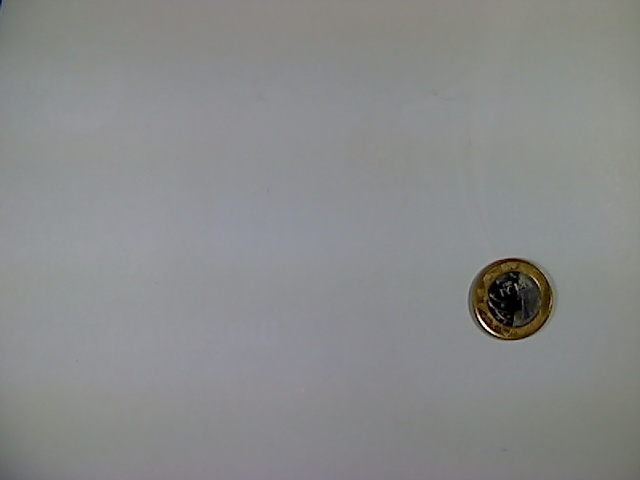

25_1477285188.jpg


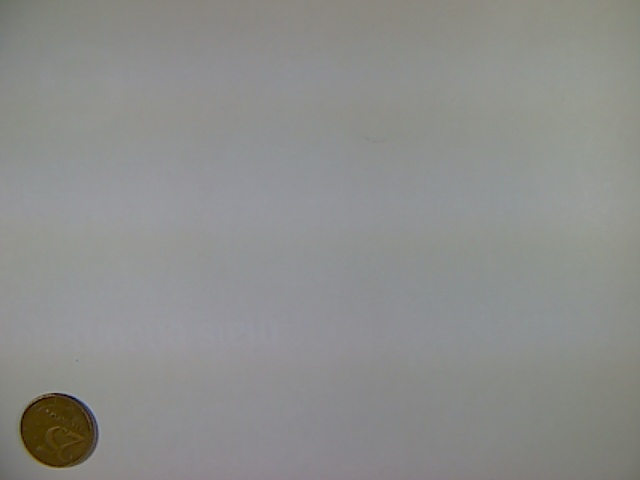

In [45]:
folder = "coins/br-coins/all"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [46]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_data = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    coin = int(_file[0:label_in_file])
    mapping = {5: 0, 10: 1, 25: 2, 50: 3, 100: 4}
    y_data.append(mapping[coin])
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 640
image_height = 480
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels), dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 3059
250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
All images to array!


In [76]:
#split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset, y_data, test_size=0.2)

print('X_train = ' + str(len(X_train)))
print('X_test = ' + str(len(X_test)))
print('Y_train = ' + str(len(Y_train)))
print('Y_test = ' + str(len(Y_test)))

#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).

X_train = X_train.reshape(X_train.shape[0], 120, 160, 3)
X_test = X_test.reshape(X_test.shape[0], 120, 160, 3)
input_shape = (120, 160, 3)

#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

print(X_train[0])

X_train = 2447
X_test = 612
Y_train = 2447
Y_test = 612
X_train shape: (2447, 120, 160, 3)
[[[ 0.39607844  0.40784314  0.38039216]
  [ 0.40784314  0.41960785  0.38431373]
  [ 0.41568628  0.42745098  0.39215687]
  ..., 
  [ 0.48235294  0.48235294  0.43529412]
  [ 0.47450981  0.47450981  0.42745098]
  [ 0.46666667  0.47450981  0.42352942]]

 [[ 0.40392157  0.41568628  0.3882353 ]
  [ 0.41568628  0.42745098  0.40000001]
  [ 0.42352942  0.43529412  0.40000001]
  ..., 
  [ 0.49019608  0.48235294  0.43529412]
  [ 0.47843137  0.47843137  0.43137255]
  [ 0.47058824  0.47843137  0.42745098]]

 [[ 0.41176471  0.41568628  0.39215687]
  [ 0.42352942  0.42745098  0.40392157]
  [ 0.43137255  0.43529412  0.40392157]
  ..., 
  [ 0.49411765  0.48627451  0.43921569]
  [ 0.48235294  0.48235294  0.43529412]
  [ 0.47058824  0.47843137  0.42745098]]

 ..., 
 [[ 0.36078432  0.36862746  0.35686275]
  [ 0.3764706   0.3764706   0.36862746]
  [ 0.3882353   0.3882353   0.3882353 ]
  ..., 
  [ 0.40392157  0.403921

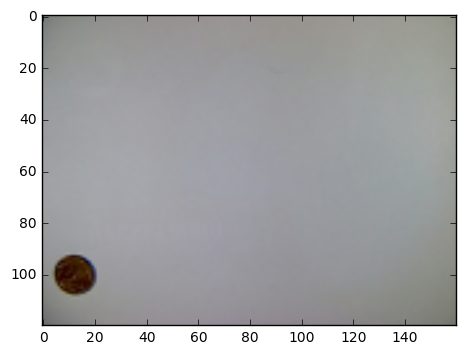

1


In [77]:
import matplotlib.pyplot as plt
import numpy as np
num = 159
pixels = np.array(X_train[num], dtype='float32')
pixels = pixels.reshape((120, 160, 3))
plt.imshow(pixels)
plt.show()
print(Y_train[num])

In [78]:
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [79]:
from keras.utils import np_utils
n_classes = len(set(Y_train))
print(n_classes)

Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

5


In [80]:
sess = tf.Session()
with tf.device('/cpu:0'):
    classifier = Sequential()
    classifier.add(Convolution2D(32, 3, 3, input_shape = (120, 160, 3), activation='relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(output_dim = 128, activation='relu'))
    classifier.add(Dense(output_dim = n_classes, activation=tf.nn.softmax))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

    batch_size = 128
    n_epoch = 20

    classifier.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(120, 160,...)`
/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation=<function ..., units=5)`


Train on 2447 samples, validate on 612 samples
Epoch 1/20
2447/2447 [==============================] - 56s 23ms/step - loss: 10.1395 - acc: 0.2011 - val_loss: 6.7767 - val_acc: 0.2206
Epoch 2/20
2447/2447 [==============================] - 40s 16ms/step - loss: 6.1714 - acc: 0.2170 - val_loss: 1.7264 - val_acc: 0.1944
Epoch 3/20
2447/2447 [==============================] - 40s 16ms/step - loss: 1.5689 - acc: 0.3204 - val_loss: 1.5519 - val_acc: 0.3301
Epoch 4/20
2447/2447 [==============================] - 41s 17ms/step - loss: 1.3261 - acc: 0.5341 - val_loss: 1.4507 - val_acc: 0.4542
Epoch 5/20
2447/2447 [==============================] - 48s 19ms/step - loss: 1.0469 - acc: 0.6624 - val_loss: 1.3776 - val_acc: 0.4820
Epoch 6/20
2447/2447 [==============================] - 46s 19ms/step - loss: 0.8131 - acc: 0.8022 - val_loss: 1.2624 - val_acc: 0.5278
Epoch 7/20
2447/2447 [==============================] - 46s 19ms/step - loss: 0.5992 - acc: 0.8782 - val_loss: 1.2136 - val_acc: 0.5392


In [83]:
preds = classifier.predict(X_test)

In [ ]:
n = 2
plt.figure(figsize=(120,160))
for i in range(300,305):
    #plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i])
    plt.title('Label: {}\nPredicted: {}'.format(np.argmax(Y_test[i]), np.argmax(preds[i])))
    plt.axis('off')
plt.show()